home work #9

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Load the fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

4422102/4422102 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28), y_train shape: (60000,)


In [3]:
#transform demension of rhe data from 3D to 2D
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [4]:
# Normalize the pixel values to be between 0 and 1
# (i.e., the pixel values are between 0 and 255, we want them to be between 0 and 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [109]:
#Create a model
#Add network layers
#input layer, 800 neurons, 784 input in each neuron, activation function relu
#hidden layer, 400 neurons, activation function relu
#hidden layer, 200 neurons, activation function relu
#hidden layer, 100 neurons, activation function relu
#output layer, 10 neurons, activation function softmax
model = keras.Sequential(
    [
        layers.Dense(800, activation="relu", input_shape=(784,)),
        layers.Dense(400, activation="relu"),
        layers.Dense(200, activation="relu"),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [119]:
# Compile the model with the specified loss function and optimizer
#Available optimizers
#loss function: sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy, mean_squared_error, mean_absolute_error, etc.
#optimizer: Adam, RMSprop, SGD, Adagrad, Adadelta, Adamax, Nadam, Ftrl, etc.


model.compile(optimizer="Adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [120]:
# Train the model with 10 epochs, batch size 32, validation data, verbose 2, shuffle true,  and callbacks
#callbacks: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
#EarlyStopping: stop training when a monitored metric has stopped improving
#ReduceLROnPlateau: reduce learning rate when a metric has stopped improving
#ModelCheckpoint: save the model after every epoch
#verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
#shuffle: whether to shuffle the training data before each epoch
#batch_size: number of samples per gradient update
#validation_data: data on which to evaluate the loss and any model metrics at the end of each epoch
#epochs: number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=1,
                    shuffle=True,
                    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=2, mode="auto"),
                               keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, verbose=2, mode="auto"),
                               keras.callbacks.ModelCheckpoint("model.h5", monitor="val_loss", save_best_only=True, verbose=2)]
                    )

Epoch 1/20
937/938 [============================>.] - ETA: 0s - loss: 0.2917 - accuracy: 0.8953
Epoch 1: val_loss improved from inf to 0.39123, saving model to model.h5
938/938 [==============================] - 20s 21ms/step - loss: 0.2917 - accuracy: 0.8953 - val_loss: 0.3912 - val_accuracy: 0.8590 - lr: 0.0010
Epoch 2/20
935/938 [============================>.] - ETA: 0s - loss: 0.2669 - accuracy: 0.9017
Epoch 2: val_loss improved from 0.39123 to 0.35282, saving model to model.h5
938/938 [==============================] - 18s 19ms/step - loss: 0.2671 - accuracy: 0.9017 - val_loss: 0.3528 - val_accuracy: 0.8751 - lr: 0.0010
Epoch 3/20
937/938 [============================>.] - ETA: 0s - loss: 0.2528 - accuracy: 0.9058
Epoch 3: val_loss did not improve from 0.35282
938/938 [==============================] - 18s 19ms/step - loss: 0.2528 - accuracy: 0.9058 - val_loss: 0.3577 - val_accuracy: 0.8782 - lr: 0.0010
Epoch 4/20
938/938 [==============================] - ETA: 0s - loss: 0.2426 

In [121]:
#save the model
model.save("model.h5")

In [122]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - loss: 0.3984 - accuracy: 0.9028 - 1s/epoch - 4ms/step
Test accuracy: 0.9028000235557556


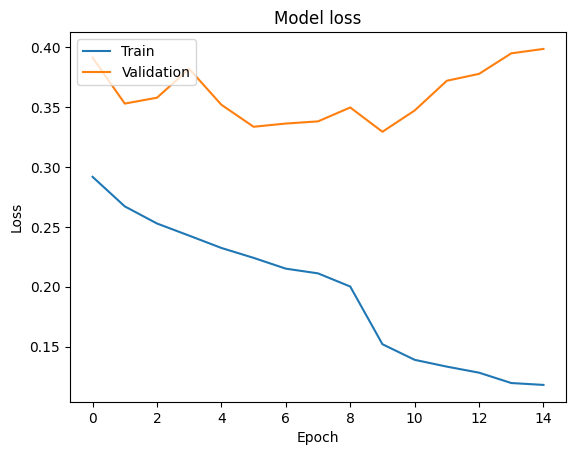

In [123]:
#plot the training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


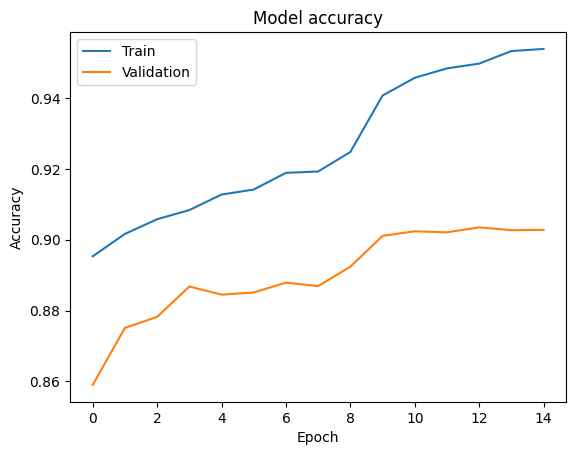

In [124]:
#plot the training and validation accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

In [125]:
#make predictions
predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
print(y_test[0])

313/313 [==============================] - 1s 4ms/step
[6.7315528e-17 3.6137402e-13 8.2542871e-23 1.5559784e-22 9.7900210e-24
 7.7127547e-11 3.1856698e-19 9.5359276e-10 5.9825858e-22 9.9999994e-01]
9
9


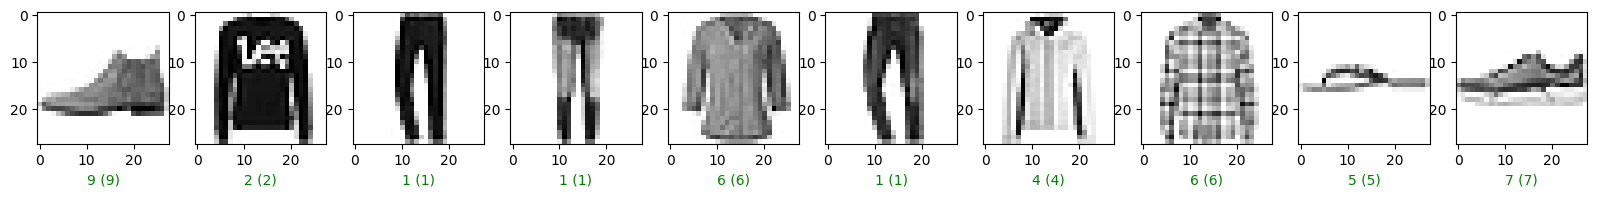

In [126]:
#plot the first 10 test images, their predicted labels, and the true labels
#color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = "green"
    else:
        color = "red"
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)

plt.show()